In [1]:
import pandas as pd
from tables import *
import csv
import numpy as np
import pickle
import time
from scipy import sparse
from tqdm import tqdm_notebook as tqdm

In [2]:
path = "/mnt/disks/sdc/data/"

In [3]:
with open(path+'authors_disc.p','rb') as f:
    authors_disc_idx = pickle.load(f)
list_disciplines = list(authors_disc_idx.keys())
nb_disciplines = len(list_disciplines)

In [4]:
del authors_disc_idx

In [7]:
h5file_stats = open_file(path + 'sim_statistics.h5', mode="r", title="sim_stats")


In [8]:
dict_stats = {}
for disc in list_disciplines:
    dict_stats[disc] = {}
    for i in range(3):
        dict_stats[disc][i] = []

In [9]:
for disc in list_disciplines:
    table = h5file_stats.get_node('/sim/{}'.format(disc))
    nb_lines = len(table)
    for line in table:
        type_cit = line['TypeCit']
        sim = line['Sim']
        dict_stats[disc][type_cit].append(sim)

In [10]:
from matplotlib import pyplot as plt

In [17]:
results_disc = {}
for disc in list_disciplines:
    results_disc[disc] = []
    for i in range(3):
        results_disc[disc].append(np.mean(dict_stats[disc][i]))

In [27]:
disc = list_disciplines[9]
print(disc)
print(results_disc[disc])

Mathematics
[0.27669988685325619, 0.22620857670148631, 0.18652400348285855]


In [37]:
import os

#### Histograms

In [57]:
plt.figure(figsize=(30,30))
for i in range(nb_disciplines):
    disc = list_disciplines[i]
    data = dict_stats[disc]
    x1 = dict_stats[disc][0]
    x2 = dict_stats[disc][1]
    x3 = dict_stats[disc][2]

    kwargs = dict(alpha=1, bins=100)
    plt.subplot(4,4,i+1)
    plt.hist(x3, **kwargs, color='r', label='Others')
    plt.hist(x2, **kwargs, color='b', label='Network')
    plt.hist(x1, **kwargs, color='g', label='Self')

    plt.tick_params(labelsize=12)
    plt.title(disc,size=20)
    plt.ylabel('Frequency')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'distributions_sim_sample.png')
plt.close()

### Bar plots average

#### Avg sim

In [58]:
plt.figure(figsize=(30,30))
for i in range(nb_disciplines):
    disc = list_disciplines[i]
    data = dict_stats[disc]
    x1 = np.mean(dict_stats[disc][0])
    x2 = np.mean(dict_stats[disc][1])
    x3 = np.mean(dict_stats[disc][2])
    
    e1 = np.std(dict_stats[disc][0])/np.sqrt(len(dict_stats[disc][0]))
    e2 = np.std(dict_stats[disc][1])/np.sqrt(len(dict_stats[disc][1]))
    e3 = np.std(dict_stats[disc][2])/np.sqrt(len(dict_stats[disc][2]))

    plt.subplot(4,4,i+1)
    barlist = plt.bar([1,2,3],[x1,x2,x3],yerr=[e1,e2,e3], color='r')
    barlist[0].set_color('g')
    barlist[1].set_color('b')
    labels = ['self','network','others']
    plt.tick_params(labelsize=12)
    plt.xticks([1,2,3],labels)
    plt.title(disc,size=20)
    plt.ylabel('Similarity')
    plt.ylim([0,0.37])
    plt.legend()
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'bar_sim_sample.png')
plt.close()

#### Disimilar proportion

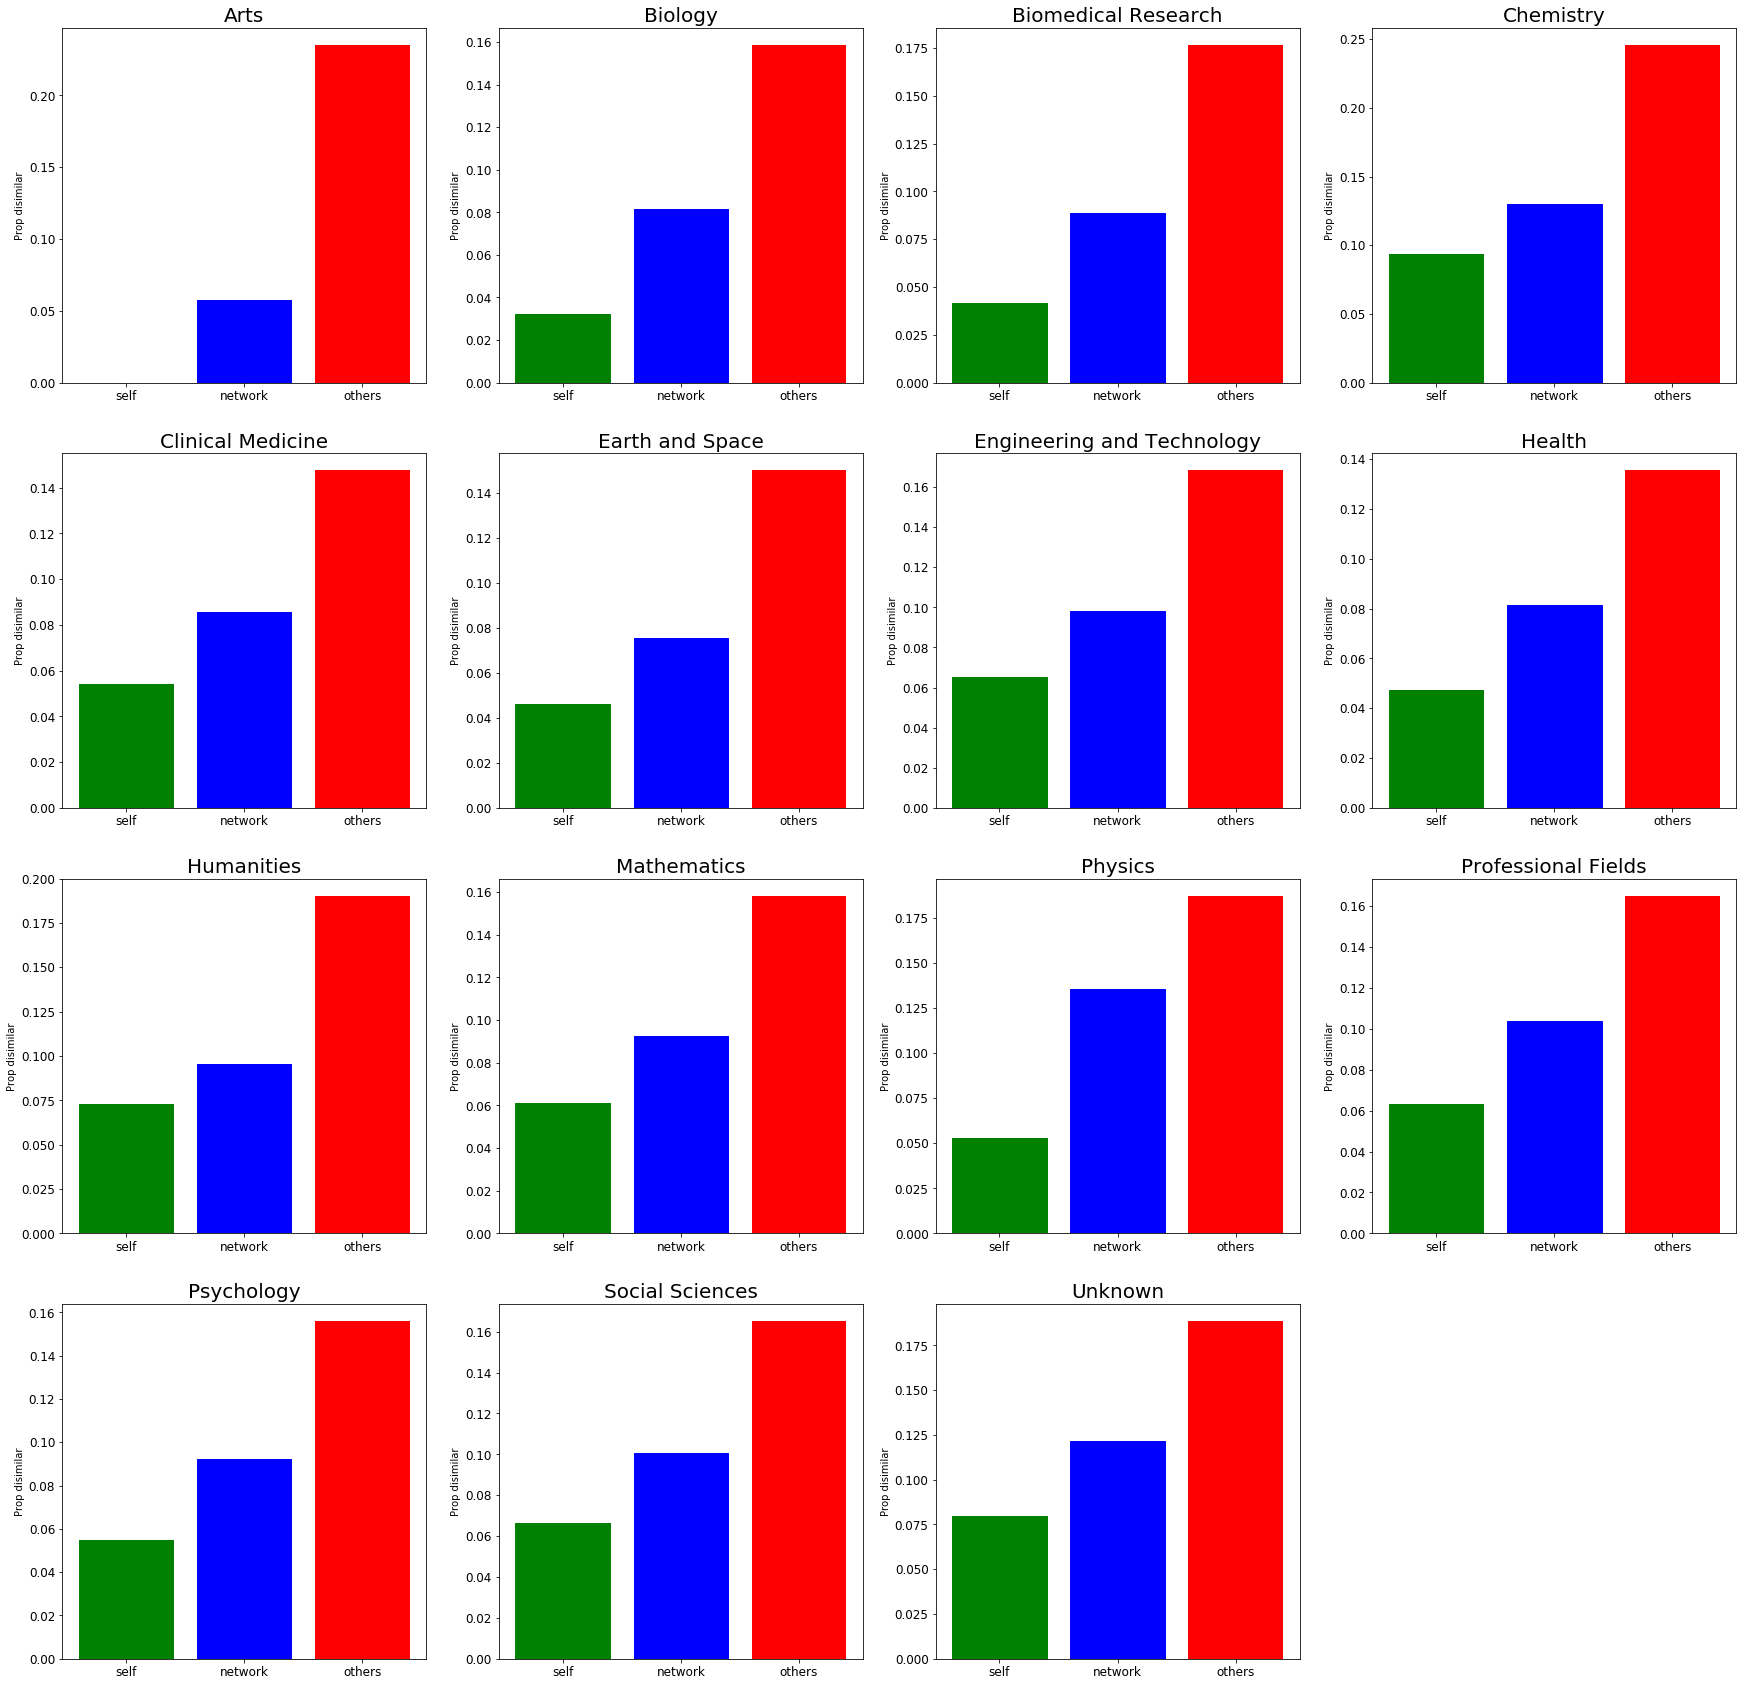

In [64]:
plt.figure(figsize=(30,30))
for i in range(nb_disciplines):
    disc = list_disciplines[i]
    data = dict_stats[disc]
    totals = np.array([len(data[j]) for j in range(3)])
    nb_dis = np.array([len(np.where(np.array(data[j]) < 0.05)[0]) for j in range(3)])
    prop_dis = np.divide(nb_dis,totals)
  
    plt.subplot(4,4,i+1)
    barlist = plt.bar([1,2,3],prop_dis, color='r')
    barlist[0].set_color('g')
    barlist[1].set_color('b')
    labels = ['self','network','others']
    plt.tick_params(labelsize=12)
    plt.xticks([1,2,3],labels)
    plt.title(disc,size=20)
    plt.ylabel('Prop disimilar')
    #plt.ylim([0,0.37])
    plt.legend()
out_path = path+'results_sim/'
plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'bar_prop_dis_sample.png')
plt.close()